#### Serial Example

In [1]:
import numpy as np
# Define an array of numbers
simple_array = np.array([0, 1, 2, 3, 4, 5])

In [2]:
# Define a function that squares numbers
def square_a_number(x):
    return x * x

In [3]:
# Loop over each element and perform an action on it
for element in simple_array:
    # Print the result of the function
    print(square_a_number(element))

0
1
4
9
16
25


#### The `map` function 

In [4]:
def simple_map(function, array):
    # create an empty array/list for the results
    output = []

    # loop over each element
    for element in array:
        
        # add the intermediate result to the container
        output.append(function(element))
    
    # return the now-filled container
    return output

In [5]:
simple_map(square_a_number, simple_array)

[0, 1, 4, 9, 16, 25]

##### Python version of `map` function

In [6]:
list(map(square_a_number, simple_array))

[0, 1, 4, 9, 16, 25]

##### The ``Mutiprocessing`` library and the ``Pool`` class

In [7]:
import multiprocessing
# Create a pool of processes
with multiprocessing.Pool(processes=6) as pool:
    # Map the function to the data
    results = pool.map(square_a_number, simple_array)

In [8]:
# Each element of this list was handled by a different process
results

[0, 1, 4, 9, 16, 25]

In [9]:
import os
def process_verification(x):
    # print the index of the job and it's Process ID number
    info = f"x = {x}, PID = {os.getpid()}"
    return info

In [10]:
list(map(process_verification, simple_array))

['x = 0, PID = 16516',
 'x = 1, PID = 16516',
 'x = 2, PID = 16516',
 'x = 3, PID = 16516',
 'x = 4, PID = 16516',
 'x = 5, PID = 16516']

In [11]:
with multiprocessing.Pool(processes=6) as pool:
    result = pool.map(process_verification, simple_array)

In [12]:
result

['x = 0, PID = 16648',
 'x = 1, PID = 16649',
 'x = 2, PID = 16650',
 'x = 3, PID = 16651',
 'x = 4, PID = 16648',
 'x = 5, PID = 16652']

#### Simple Parallel  - Monte Carlo Pi Calculation

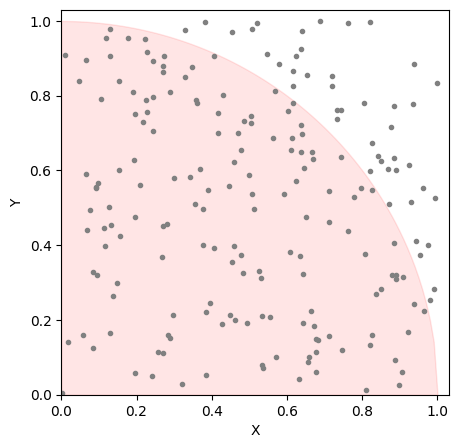

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
x = np.linspace(0, 1, 100)

# Fill between for the quarter circle, in a light gray color
plt.fill_between(x, np.sqrt(1 - x**2), 0, color='red', alpha=0.1)

plt.xlim(0, 1.03)
plt.ylim(0, 1.03)
plt.xlabel('X')
plt.ylabel('Y')

x = np.random.random(size=200)
y = np.random.random(size=200)

# Plot points in black
plt.plot(x, y, marker='.', linestyle='None', color='gray')

plt.show()


Serial implementation

In [14]:
import random

def compute_pi_serial(num_samples):
    inside_circle = 0
    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return 4 * inside_circle / num_samples


In [15]:
num_samples = 100000000
# %timeit compute_pi_serial(num_samples)

In [16]:
import time
start_time = time.perf_counter()  # Start timing
pi_estimate = compute_pi_serial(num_samples)
end_time = time.perf_counter()  # End timing

In [17]:
print(f"Estimated Pi (Serial): {pi_estimate}")
print(f"Execution Time (Serial): {end_time - start_time} seconds")

Estimated Pi (Serial): 3.1415434
Execution Time (Serial): 37.51551122099772 seconds


In [18]:
import multiprocessing
import random
import time

def compute_pi(num_samples):
    inside_circle = 0
    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return inside_circle

num_processes = 4
samples_per_process = num_samples // num_processes
remainder = num_samples % num_processes

# Distribute the remainder to the last process
samples_per_process_list = [samples_per_process] * num_processes
samples_per_process_list[-1] += remainder

start_time = time.perf_counter()  # Start timing

with multiprocessing.Pool(num_processes) as pool:
    results = pool.map(compute_pi, samples_per_process_list)

end_time = time.perf_counter()  # End timing

pi_estimate = 4.0 * sum(results) / num_samples

In [19]:
print(f"Estimated Pi (Multiprocessing): {pi_estimate}")
print(f"Execution Time (Multiprocessing): {end_time - start_time} seconds")

Estimated Pi (Multiprocessing): 3.14161784
Execution Time (Multiprocessing): 11.573350905000552 seconds


In [20]:
results,samples_per_process_list

([19636604, 19636142, 19634917, 19632783],
 [25000000, 25000000, 25000000, 25000000])

In [21]:
4.0 * np.array(results)/samples_per_process_list

array([3.14185664, 3.14178272, 3.14158672, 3.14124528])

In [22]:
np.mean(4.0 * np.array(results)/samples_per_process_list)

3.14161784

In [23]:
import joblib
joblib.Parallel(n_jobs=4)(joblib.delayed(compute_pi_serial)(num_samples // 4) for _ in range(4))

[3.14148384, 3.14215936, 3.1425264, 3.14136464]

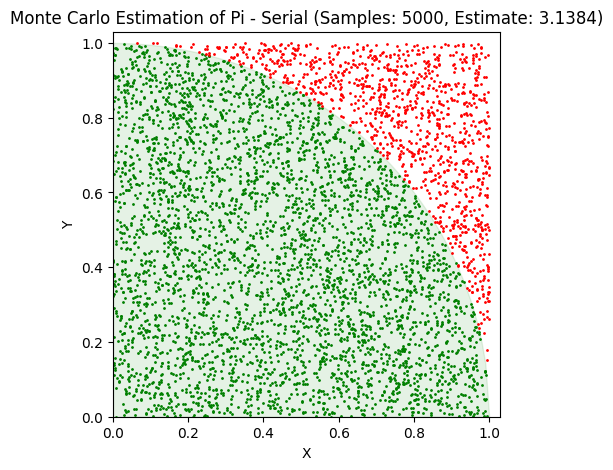

3.1384

In [24]:
import random
import matplotlib.pyplot as plt

def monte_carlo_pi(num_samples):
    inside_circle = 0
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    pi_estimate = 4 * inside_circle / num_samples

    # Plotting
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    x = np.linspace(0, 1, 100)
    plt.fill_between(x, np.sqrt(1 - x**2), 0, color='green', alpha=0.1)

    plt.scatter(x_inside, y_inside, color='green', s=1)
    plt.scatter(x_outside, y_outside, color='red', s=1)
    plt.xlim(0, 1.03)
    plt.ylim(0, 1.03)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Monte Carlo Estimation of Pi - Serial (Samples: {num_samples}, Estimate: {pi_estimate})')
    plt.show()

    return pi_estimate


monte_carlo_pi(5000)


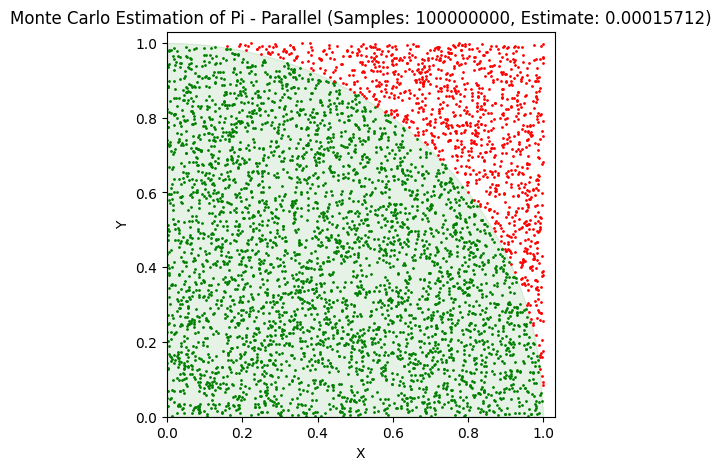

In [25]:
import multiprocessing
import random
import matplotlib.pyplot as plt

def compute_pi(num_samples, return_dict, process_id):
    inside_circle = 0
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    return_dict[process_id] = (inside_circle, x_inside, y_inside, x_outside, y_outside)

num_samples_plot = 5000
num_processes = 4
samples_per_process = num_samples_plot // num_processes
remainder = num_samples_plot % num_processes

samples_per_process_list = [samples_per_process] * num_processes
samples_per_process_list[-1] += remainder

manager = multiprocessing.Manager()
return_dict = manager.dict()

processes = []
for i in range(num_processes):
    p = multiprocessing.Process(target=compute_pi, args=(samples_per_process_list[i], return_dict, i))
    processes.append(p)
    p.start()

for p in processes:
    p.join()

total_inside_circle = sum([return_dict[i][0] for i in range(num_processes)])
x_inside = sum([return_dict[i][1] for i in range(num_processes)], [])
y_inside = sum([return_dict[i][2] for i in range(num_processes)], [])
x_outside = sum([return_dict[i][3] for i in range(num_processes)], [])
y_outside = sum([return_dict[i][4] for i in range(num_processes)], [])

pi_estimate = 4.0 * total_inside_circle / num_samples

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
x = np.linspace(0, 1, 100)

plt.fill_between(x, np.sqrt(1 - x**2), 0, color='green', alpha=0.1)
plt.scatter(x_inside, y_inside, color='green', s=1)
plt.scatter(x_outside, y_outside, color='red', s=1)
plt.xlim(0, 1.03)
plt.ylim(0, 1.03)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Monte Carlo Estimation of Pi - Parallel (Samples: {num_samples}, Estimate: {pi_estimate})')
plt.show()


In [29]:
from numba import cuda, vectorize
import numpy as np
import time

@vectorize(['float32(float32, float32)'], target='cuda')
def is_inside_circle(x, y):
    return 1 if x**2 + y**2 <= 1 else 0

def compute_pi_gpu(num_samples):
    x = np.random.rand(num_samples).astype(np.float32)
    y = np.random.rand(num_samples).astype(np.float32)
    
    inside_circle = is_inside_circle(x, y)
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    return pi_estimate

num_samples_gpu = 2*num_samples
start_time = time.perf_counter()
pi_estimate = compute_pi_gpu(num_samples_gpu)
end_time = time.perf_counter()

print(f"Estimated Pi (GPU): {pi_estimate}")
print(f"Execution Time (GPU): {end_time - start_time} seconds")


Estimated Pi (GPU): 3.14152064
Execution Time (GPU): 8.903454611998313 seconds
